In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
from sklearn.metrics import accuracy_score
from random import seed


In [13]:
#create the artificial data (classification like customise one according to our data)
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)


In [14]:
#dividing the data into train,test (like data is dividing into train,test,cv 60%,20%,20%)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


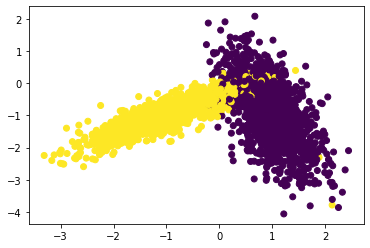

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [17]:
# Reference:
# https://www.kaggle.com/bhushanyadav07/implementing-custom-randomsearchcv

from sklearn.metrics import accuracy_score
import random

def randomParams(param_range):
    paramValues = random.sample(range(1, param_range), 10)
    paramValues.sort()
    return paramValues

def train_cv_indices(x_train, fold, folds):
    bounds = int(len(x_train) / folds)
    return list(set(list(range((bounds * fold), (bounds * (fold + 1))))))

def RandomSearchCV(x_train, y_train, classifier, param_range, folds):
    trainscores = []
    testscores  = []  
    
    params_list = randomParams(param_range)
    params = {'n_neighbors': params_list}
                           
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        
        for fold in range(0, folds):
            test_indices  = train_cv_indices(x_train, fold, folds)
            train_indices = list(set(list(range(1, len(x_train)))) - set(test_indices))
        
        
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores, params

100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


{'n_neighbors': [6, 9, 17, 24, 28, 40, 42, 45, 46, 47]}


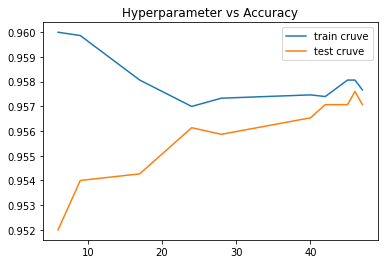

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


classifier = KNeighborsClassifier()

param_range = 50
folds = 3

trainscores,testscores, params = RandomSearchCV(X_train, y_train, classifier, param_range, folds)
print(params)

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyperparameter vs Accuracy')
plt.legend()
plt.show()

In [19]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['lightcyan', 'gainsboro'])
    cmap_bold = ListedColormap(['teal', 'gray'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

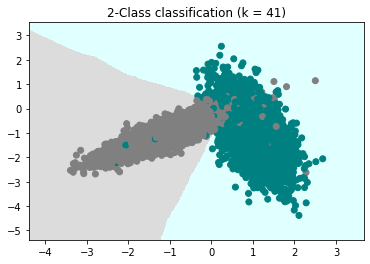

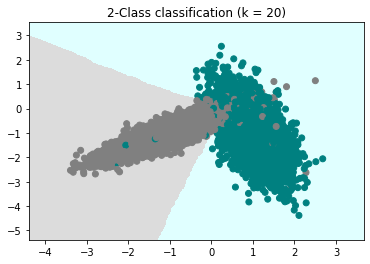

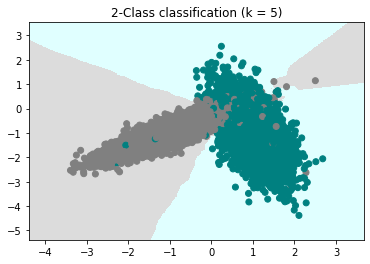

In [22]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 41)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 20)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)